In [2]:
import math
import numpy as np
import pandas as pd
from simanneal import Annealer
import inspyred
from inspyred import ec
from random import Random

# 4
Gegeven volgende te maximaliseren doelfunctie:
Met volgende beperkingen: -1.0 ≤ xi ≤ 1.0 met i=1,2
Zoek een goede oplossing.

[ 1. -1.] : 2.0


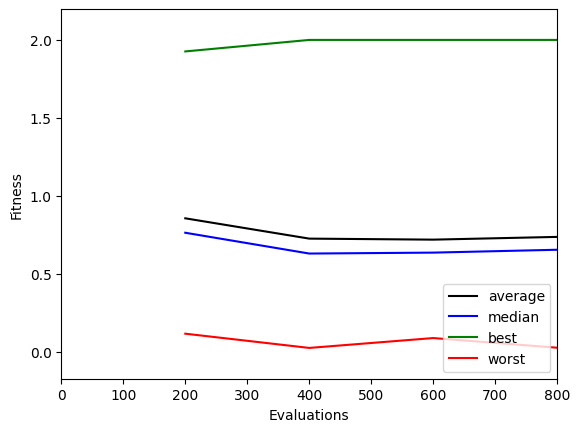

In [3]:
def generate(random = None, args = None):   # genereert 1 individu
    size = args.get('num_inputs',2)    # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=-1, high=1, size=2)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:    # fitness uitrekenen voor alle individuen
        sum = 10 * len(candidate)
        x1 = candidate[0]
        x2 = candidate[1]
        sum = 0.2 + x1**2 + x2**2
        sum = sum - 0.1 * math.cos(6*math.pi*x1) -0.1 * math.cos(6*math.pi*x2)
        fitness.append(sum)
    return fitness
rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    pop_size=200,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(-1, 1),
    max_evaluations=800,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])

[-1.         -0.99534327] : 1.9910932281212017


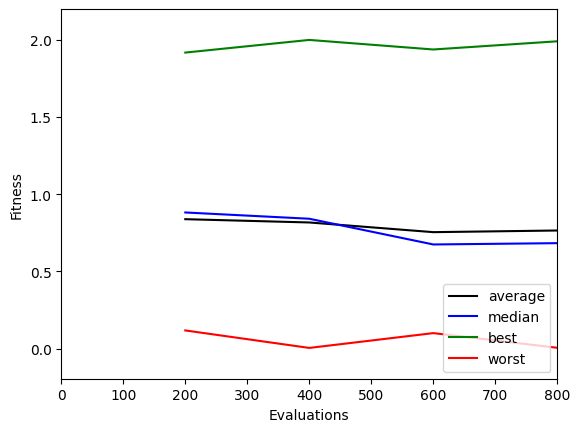

In [4]:
def generate(random = None, args = None):   # genereert 1 individu
    size = args.get('num_inputs',2)    # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=-1, high=1, size=2)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:    # fitness uitrekenen voor alle individuen
        sum = 10 * len(candidate)
        x1 = candidate[0]
        x2 = candidate[1]
        sum = 0.2 + x1**2 + x2**2
        sum = sum - 0.1 * math.cos(6*math.pi*x1) -0.1 * math.cos(6*math.pi*x2)
        fitness.append(sum)
    return fitness
rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    pop_size=200,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(-1, 1),
    max_evaluations=800,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])

In [5]:
class OptimalisatieProblem(Annealer):
    def energy(self):
        x1 = self.state[0]
        x2 = self.state[1]
        sum = 0.2 + self.state[0]**2 + self.state[1]**2
        sum = sum - 0.1 * math.cos(6*math.pi*x1) -0.1 * math.cos(6*math.pi*x2) 
        return -sum    # + voor minimum - voor maximum

    def move(self):
        i = np.random.randint(0,2)
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], -1, 1)

# minimum = 0 in (0,0)
init_sol =  np.random.uniform(-1,1, size=2) #initial solution: array met 2 elementen
opdracht=OptimalisatieProblem(init_sol)
# set annealing parameters, if not default values will be used
opdracht.Tmax = 25000.0 
opdracht.Tmin = 2.5 
opdracht.updates = 1000
opdracht.steps = 100000
opt_sol = opdracht.anneal()
print(opt_sol)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


(array([-1., -1.]), -2.0)


# 2
Je bent belast met het ontwerp van dakgoten waarbij de productiekost zo laag mogelijk moet zijn.
Daarom is het noodzakelijk dat de dakgoten een zo optimale doorsnede hebben met het beschikbare
materiaal zodat bladeren en vuil makkelijk afgevoerd kunnen worden. Het bedrijf waarvoor je werkt
koopt metalen platen aan die een breedte hebben van 1m. M.a.w. H + B + H -zie tekening- moet kleiner
of gelijk zijn aan 1m. Bepaal de ideale breedte B en hoogte H van de dakgoot die
je uit de platen van 1m kan maken.

[0.50104987] : 0.12499944888566777


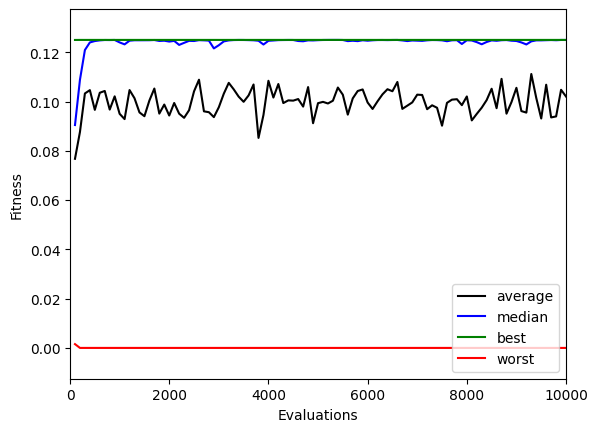

In [29]:
min = 0
max = 1
def generate(random = None, args = None):   # genereert 1 individu
    size = args.get('num_inputs',2)    # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=min, high=max, size=1)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:    # fitness uitrekenen voor alle individuen

        b = candidate[0]
        sum = b * ((1 - b)/2)
        fitness.append(sum)
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation] # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector = ec.selectors.fitness_proportionate_selection, # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    pop_size=100,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(min, max),
    max_evaluations=10000,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True) # dan is 1ste de beste van de laatste populatie
print(population[0])

In [7]:
class OptimalisatieProblem(Annealer):
    def energy(self):
        b = self.state[0]
        sum = b * ((1 - b)/2)
        return -sum    # + voor minimum - voor maximum

    def move(self):
        i = 0
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], 0, 1)
init_sol =  np.random.uniform(0,1, size=1) #initial solution: array met 1 elementen
opdracht=OptimalisatieProblem(init_sol)
# set annealing parameters, if not default values will be used
opdracht.Tmax = 25000.0 
opdracht.Tmin = 2.5 
opdracht.updates = 1000
opdracht.steps = 100000
opt_sol = opdracht.anneal()
print(opt_sol)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


(array([0.49998568]), -0.12499999989751234)


# 1
Je bevindt je in een geheime kamer die uitgerust is met een deur met tijdslot. Je ziet een timer aftellen
die meldt dat je nog maar vijf minuten over het alvorens de deur voor altijd op slot zal zijn. Voor je neus
liggen waardevolle voorwerpen met elk hun eigen opbrengst en gewicht. Je hebt een rugzak bij die een
absoluut maximaal gewicht kan torsen van 750gr. Op Canvas vind je de lijst van voorwerpen met hun
gewicht en opbrengst. Stel de optimale rugzak samen. Je zou op een optimale opbrengst van 1458
moeten uitkomen (of toch zeker een waarde dicht daarbij in de buurt).

[1 0 0 1 1 1 1 0 0 1 1 0 0 1 0] : 1417


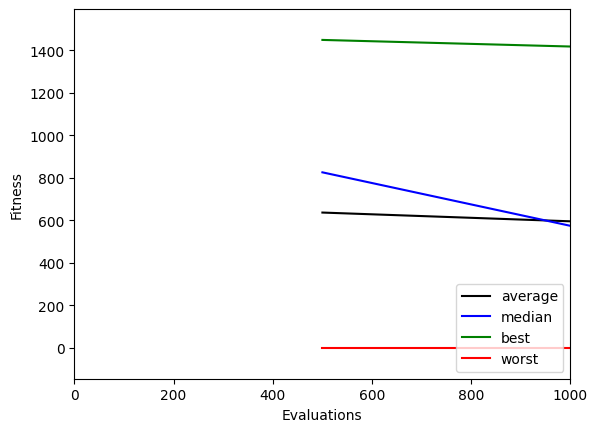

In [8]:
knapsack = pd.read_csv("../../oefeningen/DataSets/Knapsack Items.csv")
def evaluate(candidates, args=None):
    fitness = []
    weight_items = args.get('weights_items')
    waarde_items = args.get('waarde_items')
    for candidate in candidates:  # fitness uitrekenen voor alle individuen
        sumw = (candidate * weight_items).sum()
        if sumw > 750:
            sumv = 0
        else: 
            sumv = (candidate * waarde_items).sum()
        fitness.append(sumv)
    return fitness

def generate(random=None, args=None):  # genereert 1 individu

    number_items = args.get('number_items', 15)  # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.randint(0, 2, size=number_items)





rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    tournament_size= 250,
    pop_size=500,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(0, 1),
    max_evaluations=1000,
    mutation_rate=0.25,
    number_items = len(knapsack),
    weights_items=knapsack['gewichten(gr)'],
    waarde_items=knapsack['waarde'])
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])

In [9]:
data = pd.read_csv("../../oefeningen/DataSets/Knapsack Items.csv")
# data
class OptimalisatieProblem(Annealer):
    def energy(self):
        list = self.state
        sum = (list * value).sum()
        if (list * weight).sum() > 750:
            sum = 0
        
        return -sum    # + voor minimum - voor maximum

    def move(self):
        i = np.random.randint(0,len(self.state))
        self.state[i] = not self.state[i]
        # self.state[i] = np.clip(self.state[i], 0, 1)
weight=data['gewichten(gr)']
value=data.waarde
init_sol =  np.random.uniform(0,2,size=len(data)) #initial solution: array met 1 elementen
opdracht=OptimalisatieProblem(init_sol)
# set annealing parameters, if not default values will be used
opdracht.Tmax = 25000.0 
opdracht.Tmin = 2.5 
opdracht.updates = 1000
opdracht.steps = 100000
opt_sol = opdracht.anneal()
print(opt_sol)


 Temperature        Energy    Accept   Improve     Elapsed   Remaining


(array([1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.]), -1458.0)


# Vraag 3: Het voetbalstadion
De plaatselijke sportclub wil een nieuw stadion bouwen. De
omtrek van het sportveld moet 400m bedragen, en tegelijkertijd
willen we ervoor zorgen dat het centrale middenveld een maximale
oppervlakte heeft. Bepaal de ideale lengte –en
breedteverhouding.

[100.00612679 103.71705922] : 6366.197699778652


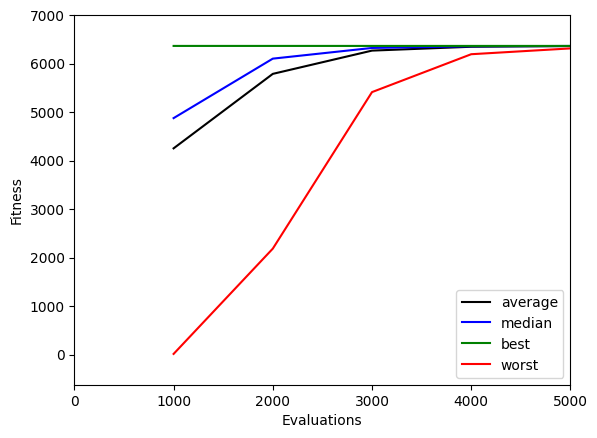

In [10]:
def generate(random=None, args=None):  # genereert 1 individu
    size = args.get('num_inputs', 2)  # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=0, high=200, size=size)


def evaluate(candidates, args=None):
    fitness = []
    
    for candidate in candidates:  # fitness uitrekenen voor alle individuen
        l=candidate[0]
        b= (400 - 2 * l)/ math.pi 
        sum =  b * l
        fitness.append(sum)
    return fitness


rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    tournament_size=250,
    pop_size=1000,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(0, 200),
    max_evaluations=5000,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])

In [11]:
class voetbalProblem(Annealer):
    def energy(self):
        l = self.state[0]
        b= (400 - 2 * l)/ math.pi 
        sum =  b * l
        return - sum    # + voor minimum - voor maximum

    def move(self):
        i=0
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], 0, 200)
init_sol =  np.random.uniform(0,200, size=1) #initial solution: array met 1 elementen
opdracht=voetbalProblem(init_sol)
# set annealing parameters, if not default values will be used
opdracht.Tmax = 25000.0 
opdracht.Tmin = 2.5 
opdracht.updates = 1000
opdracht.steps = 100000
opt_sol = opdracht.anneal()
print(opt_sol)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


(array([100.00023291]), -6366.1977236412795)
